In [1]:
import csv
import os
import lightkurve as lk
from lightkurve import search_targetpixelfile
import numpy as np
from numpy import random
from scipy.optimize import leastsq
from tqdm import tqdm
import astropy.units as u
import pylab as plt
import gzip
import shutil
plt.rcParams.update({'font.size': 22})

In [2]:
f=open('/Users/AllieMcCarthy/REU/K2data/K2dataFinal.csv')
csv_f=csv.reader(f)
header=next(csv_f)
corrected_periods=[]
for row in csv_f:
  try:
            EPIC = int(row[0])
            print(EPIC)
            ob_name = row[1]
            campaign_num = int(row[2])
        #Actually Running Lightkurve
            tpf = search_targetpixelfile(EPIC, mission='K2', campaign=campaign_num, cadence='short').download()
        #Target Pixel File and Aperture Mask
            user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
            user_lc = user_lc.remove_nans().remove_outliers()
        #Uncorrected Periodogram
            p = user_lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
        #Lomb Scargle Periodogram
            raw_periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc, minimum_period=0.05, maximum_period =10)
            period_at_max_power_user_lc= raw_periodogram.period_at_max_power
        #Normalize and Correct Lightcurve
            lc = tpf.to_lightcurve().normalize().remove_nans().remove_outliers()
            clc = lc.correct(windows=10).remove_outliers().fill_gaps()
            fluxarray=clc.flux
            stddev=np.std(fluxarray)
        #Corrected Periodogram
            corrected_periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc, minimum_period=0.05, maximum_period =100)
            corrected_period_at_max_power= corrected_periodogram.period_at_max_power
            corrected_periods.append(corrected_period_at_max_power.value)
            
            tpf.close()
  except:
            print(str(EPIC)+"_"+str(campaign_num)+' has a problem')
            pass
        
print (corrected_periods)

212178513


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

212178513_5 has a problem
212178513


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212178513_18 has a problem
211332457


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211332457_5 has a problem
211332457


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211332457_18 has a problem
211329075


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211329075_5 has a problem
211329075


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211329075_18 has a problem
211962038


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211962038_5 has a problem
211962038


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211962038_18 has a problem
211970944


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211970944_5 has a problem
211970944


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211970944_18 has a problem
212028433


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212028433_5 has a problem
212028433


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212028433_16 has a problem
212028433


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212028433_18 has a problem
212102189


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212102189_5 has a problem
212102189


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212102189_16 has a problem
212102189


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212102189_18 has a problem
212136544


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212136544_5 has a problem
212136544


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212136544_18 has a problem
211727819


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211727819_5 has a problem
211727819


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211727819_18 has a problem
211891128


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211891128_5 has a problem
211891128


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211891128_18 has a problem
211963497


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211963497_5 has a problem
211978512


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211978512_5 has a problem
211981633


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211981633_5 has a problem
211981633


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211981633_18 has a problem
211680042


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211680042_5 has a problem
211680042


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211680042_18 has a problem
212111554


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212111554_5 has a problem
212111554


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212111554_16 has a problem
212111554


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212111554_18 has a problem
211628806


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211628806_5 has a problem
211628806


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211628806_18 has a problem
212127137


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212127137_5 has a problem
212127137


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212127137_16 has a problem
212127137


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212127137_18 has a problem
211328277


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

211328277_5 has a problem
211328277


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211328277_18 has a problem
212128548


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212128548_5 has a problem
212128548


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


212128548_18 has a problem
210522262


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


210522262_4 has a problem
210879793


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


210879793_4 has a problem
210998473


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


210998473_4 has a problem
210327027
210327027_4 has a problem
249914869


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

249914869_15 has a problem
211357895


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211357895_5 has a problem
211357895


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


211357895_18 has a problem
211003775
211003775_4 has a problem
[0.2452607967517502, 0.5852709992274244, 0.9132689012462915, 0.2455823518542916, 0.24558295570264116, 0.24526053011725077, 0.24583399516273177, 0.10250560298025269]


/anaconda3/lib/python3.6/site-packages/lightkurve/search.py:173: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


<function matplotlib.pyplot.show(*args, **kw)>

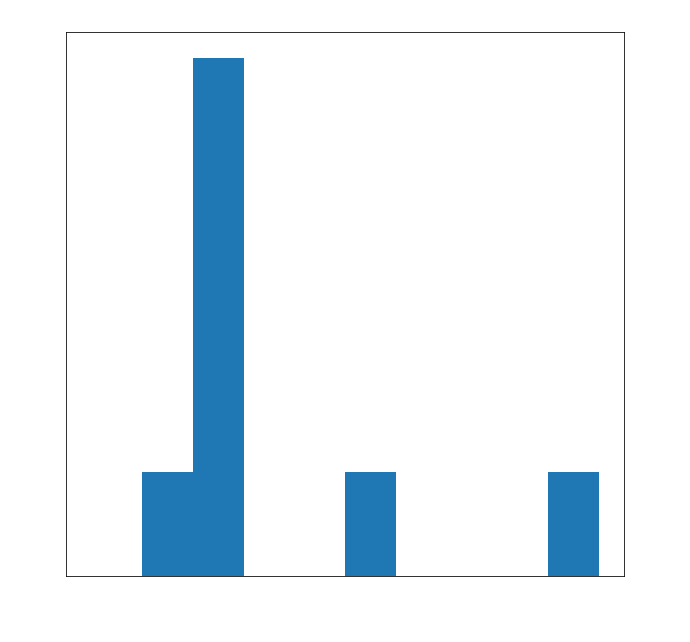

In [16]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
np.histogram(corrected_periods,bins=10,range=(0,1))
ax1.hist(corrected_periods,bins=10,range=(0,1))
x_spec_types=np.arange(0,1.1,.1)
#print(x_spec_types)
my_xticks = ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']
plt.xticks(x_spec_types, my_xticks,fontsize=24)
plt.yticks(fontsize=24)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

plt.title('Period at Max Power for Short Cadence K2 Observations',fontsize=24)
plt.xlabel('Period at Max Power',fontsize=24)
plt.ylabel('Number',fontsize=24)
plt.show



In [4]:
f=open('/Users/AllieMcCarthy/REU/K2data/K2dataFinal.csv')
csv_f=csv.reader(f)
header=next(csv_f)
corrected_periods_long=[]
for row in csv_f:
  try:
            EPIC = int(row[0])
            print(EPIC)
            ob_name = row[1]
            campaign_num = int(row[2])
        #Actually Running Lightkurve
            tpf = search_targetpixelfile(EPIC, mission='K2', campaign=campaign_num, cadence='long').download()
        #Target Pixel File and Aperture Mask
            user_lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask.astype(bool))
            user_lc = user_lc.remove_nans().remove_outliers()
        #Uncorrected Periodogram
            p = user_lc.to_periodogram(freq_unit=u.microHertz, maximum_frequency=400, minimum_frequency=10)
        #Lomb Scargle Periodogram
            raw_periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(user_lc, minimum_period=0.05, maximum_period =10)
            period_at_max_power_user_lc= raw_periodogram.period_at_max_power
        #Normalize and Correct Lightcurve
            lc = tpf.to_lightcurve().normalize().remove_nans().remove_outliers()
            clc = lc.correct(windows=10).remove_outliers().fill_gaps()
            fluxarray=clc.flux
            stddev=np.std(fluxarray)
        #Corrected Periodogram
            corrected_periodogram=lk.periodogram.LombScarglePeriodogram.from_lightcurve(clc, minimum_period=0.05, maximum_period =100)
            corrected_period_at_max_power= corrected_periodogram.period_at_max_power
            corrected_periods_long.append(corrected_period_at_max_power.value)
            
            tpf.close()
  except:
            print(str(EPIC)+"_"+str(campaign_num)+' has a problem')
            pass
        
print (corrected_periods_long)


212178513


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

212178513_5 has a problem
212178513


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212178513_18 has a problem
211332457


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211332457_5 has a problem
211332457


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211332457_18 has a problem
211329075


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211329075_5 has a problem
211329075


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211329075_18 has a problem
211962038


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211962038_5 has a problem
211962038


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211962038_18 has a problem
211970944


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211970944_5 has a problem
211970944


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211970944_18 has a problem
212028433


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212028433_5 has a problem
212028433


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212028433_16 has a problem
212028433


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212028433_18 has a problem
212102189


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212102189_5 has a problem
212102189


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212102189_16 has a problem
212102189


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212102189_18 has a problem
212136544


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212136544_5 has a problem
212136544


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212136544_18 has a problem
211727819


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

211727819_5 has a problem
211727819


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211727819_18 has a problem
211891128


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211891128_5 has a problem
211891128


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

211891128_18 has a problem
211963497


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211963497_5 has a problem
211978512


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211978512_5 has a problem
211981633


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211981633_5 has a problem
211981633


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211981633_18 has a problem
211680042


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211680042_5 has a problem
211680042


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211680042_18 has a problem
212111554


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212111554_5 has a problem
212111554


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212111554_16 has a problem
212111554


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212111554_18 has a problem
211628806


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211628806_5 has a problem
211628806


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211628806_18 has a problem
212127137


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

212127137_5 has a problem
212127137


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212127137_16 has a problem
212127137


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212127137_18 has a problem
211328277


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/anaconda3/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:613: RuntimeWarning: invalid value encountered 

211328277_5 has a problem
211328277


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211328277_18 has a problem
212128548


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212128548_5 has a problem
212128548


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

212128548_18 has a problem
210522262


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

210522262_4 has a problem
210879793


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

210879793_4 has a problem
210998473


210998473_4 has a problem
210327027


210327027_4 has a problem
249914869


249914869_15 has a problem
211357895


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211357895_5 has a problem
211357895


/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_factor=1). You can suppress this warning using `warnings.filterwarnings('ignore', category=lk.LightkurveWarning)`.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/lightcurve.py:1436: LightkurveWarning: `KeplerLightCurve.correct()` is deprecated and will be removed in Lightkurve v1.0.0, please use `LightCurve.to_corrector("sff").correct()` instead.
  LightkurveWarning)
/anaconda3/lib/python3.6/site-packages/lightkurve/periodogram.py:693: LightkurveWarning: As of Lightkurve v1.0.0 (Apr 2019), the default behavior of Lomb Scargle periodograms changed to use normalization='amplitude' and oversample_factor=5 (the previous defaults were normalization='psd' and oversample_

211357895_18 has a problem
211003775
211003775_4 has a problem
[0.4019786854216469, 6.711497023256282, 1.4156727607323722, 0.9429473086221274, 0.4542506676964083, 2.371642574922677, 0.6425907523354221, 0.2451958278363454, 0.7230184927899166, 0.24567895327039113, 2.6002157900913097, 0.9535899743958043, 0.5036822189719258, 0.24508969317480758, 0.3980499923932799, 0.29232905377144397, 0.2923051841073199, 2.408260766497263, 0.24584046641343646, 0.24551830402510372, 0.05699587755404921, 10.76052627061358, 0.09450377512027427, 2.1047784332010187, 0.15655389950896714, 0.248288174727592, 0.24524144560644562, 0.34508923307638234, 0.5731301017541237, 1.079094397183154, 0.2444876766571838, 0.8429096654827654, 1.5734180220901075, 0.24439532677684955, 1.0522925396177578, 0.7531482118962582, 0.18725562501709828, 0.24567946156781617, 0.24544922802736208]


In [17]:
corrected_periods_long.sort()
print(corrected_periods_long)

[0.05699587755404921, 0.09450377512027427, 0.15655389950896714, 0.18725562501709828, 0.24439532677684955, 0.2444876766571838, 0.24508969317480758, 0.2451958278363454, 0.24524144560644562, 0.24544922802736208, 0.24551830402510372, 0.24567895327039113, 0.24567946156781617, 0.24584046641343646, 0.248288174727592, 0.2923051841073199, 0.29232905377144397, 0.34508923307638234, 0.3980499923932799, 0.4019786854216469, 0.4542506676964083, 0.5036822189719258, 0.5731301017541237, 0.6425907523354221, 0.7230184927899166, 0.7531482118962582, 0.8429096654827654, 0.9429473086221274, 0.9535899743958043, 0.9589879121304203, 1.0522925396177578, 1.079094397183154, 1.1125275842692601, 1.4156727607323722, 1.5734180220901075, 2.0420713043355345, 2.1047784332010187, 2.371642574922677, 2.408260766497263, 2.6002157900913097, 6.711497023256282, 10.76052627061358]


In [18]:
corrected_periods_long=[0.05699587755404921, 0.09450377512027427, 0.15655389950896714, 0.18725562501709828, 0.24439532677684955, 0.2444876766571838, 0.24508969317480758, 0.2451958278363454, 0.24524144560644562, 0.24544922802736208, 0.24551830402510372, 0.24567895327039113, 0.24567946156781617, 0.24584046641343646, 0.248288174727592, 0.2923051841073199, 0.29232905377144397, 0.34508923307638234, 0.3980499923932799, 0.4019786854216469, 0.4542506676964083, 0.5036822189719258, 0.5731301017541237, 0.6425907523354221, 0.7230184927899166, 0.7531482118962582, 0.8429096654827654, 0.9429473086221274, 0.9535899743958043, 0.9589879121304203, 1.0522925396177578, 1.079094397183154, 1.1125275842692601, 1.4156727607323722, 1.5734180220901075, 2.0420713043355345, 2.1047784332010187, 2.371642574922677, 2.408260766497263, 2.6002157900913097, 6.711497023256282, 10.76052627061358]

<function matplotlib.pyplot.show(*args, **kw)>

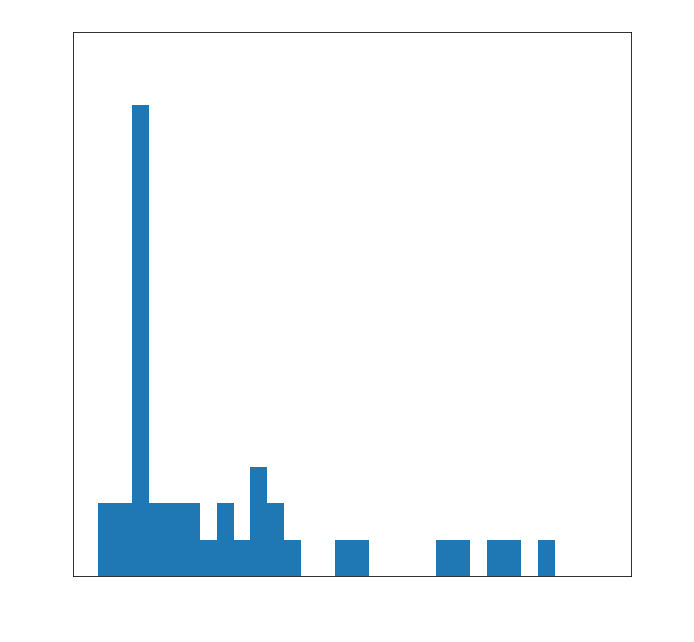

In [24]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
np.histogram(corrected_periods_long,bins=30,range=(0,3))
ax1.hist(corrected_periods_long,bins=30,range=(0,3))
#x_spec_types=np.arange(0,5,.1)
#print(x_spec_types)
#my_xticks = ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','1.1','1.2','1.3','1.4','1.5','1.6','1.7','1.8','1.9','2','0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

plt.title('Period at Max Power for Long Cadence K2 Observations',fontsize=24)
plt.xlabel('Period at Max Power',fontsize=24)
plt.ylabel('Number',fontsize=24)
plt.ylim(0,15)
plt.show



<function matplotlib.pyplot.show(*args, **kw)>

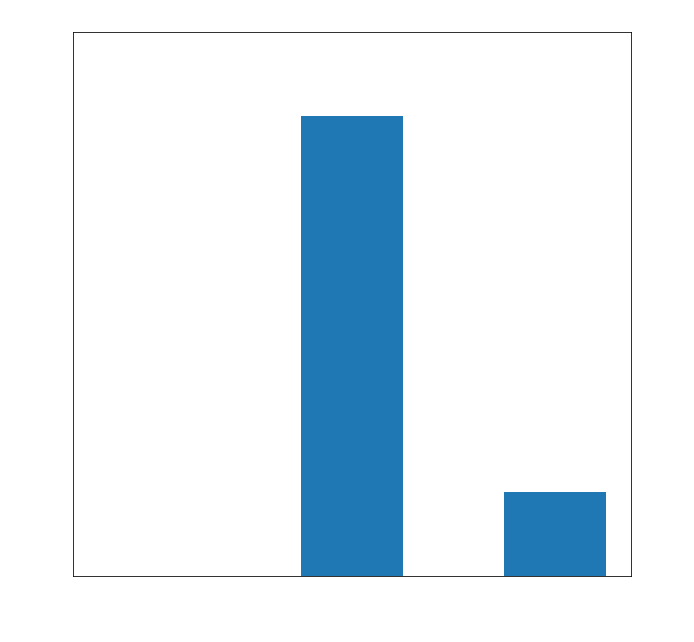

In [26]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
np.histogram(corrected_periods_long,bins=5,range=(.2,.3))
ax1.hist(corrected_periods_long,bins=5,range=(.2,.3))
#x_spec_types=np.arange(0,5,.1)
#print(x_spec_types)
#my_xticks = ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1','1.1','1.2','1.3','1.4','1.5','1.6','1.7','1.8','1.9','2','0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']
#plt.xticks(x_spec_types, my_xticks)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
ax1.yaxis.label.set_color('white')
ax1.xaxis.label.set_color('white')
ax1.title.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

plt.title('Period at Max Power for Long Cadence K2 Observations',fontsize=24)
plt.xlabel('Period at Max Power',fontsize=24)
plt.ylabel('Number',fontsize=24)
plt.ylim(0,13)
plt.show

